# SuperKart Project

## Context:

A sales forecast is a prediction of future sales revenue based on historical data, industry trends, and the status of the current sales pipeline. Businesses use the sales forecast to estimate weekly, monthly, quarterly, and annual sales totals. It is extremely important for a company to make an accurate sales forecast as it adds value across an organization and helps the different verticals to chalk out their future course of actions. Forecasting helps an organization to plan its sales operations by regions and provide valuable insights to the supply chain team regarding the procurement of goods and materials. 
An accurate sales forecast process has many benefits which include improved decision-making about the future and reduction of sales pipeline and forecast risks. Moreover, it helps to reduce the time spent in planning territory coverage and establish benchmarks that can be used to assess trends in the future.

## Objective:

SuperKart is an organization which owns a chain of supermarkets and food marts providing a wide range of products. They want to predict the future sales revenue of its different outlets so that they can strategize their sales operation across different tier cities and plan their inventory accordingly. To achieve this purpose, SuperKart has hired a data science firm, shared the sales records of its various outlets for the previous quarter and asked the firm to come up with a suitable model to predict the total sales of the stores for the upcoming quarter.


## Data Description:

The data contains the different attributes of the various products and stores.The detailed data dictionary is given below.

* Product_Id - unique identifier of each product, each identifier having two letters at the beginning followed by a number.
* Product_Weight - weight of each product
* Product_Sugar_Content - sugar content of each product like low sugar, regular and no sugar
* Product_Allocated_Area - ratio of the allocated display area of each product to the total display area of all the products in a store
* Product_Type - broad category for each product like meat, snack foods, hard drinks, dairy, canned, soft drinks, health and hygiene, baking goods, bread, breakfast, frozen foods, fruits and vegetables, household, seafood, starchy foods, others
* Product_MRP - maximum retail price of each product
* Store_Id - unique identifier of each store
* Store_Establishment_Year - year in which the store was established
* Store_Size - size of the store depending on sq. feet like high, medium and low
* Store_Location_City_Type - type of city in which the store is located like Tier 1, Tier 2 and Tier 3. Tier 1 consists of cities where the standard of living is comparatively higher than its Tier 2 and Tier 3 counterparts.
* Store_Type - type of store depending on the products that are being sold there like Departmental Store, Supermarket Type 1, Supermarket Type 2 and Food Mart
* Product_Store_Sales_Total - total revenue generated by the sale of that particular product in that particular store


In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
    StackingRegressor,
)

from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## Import Dataset

In [ ]:
kart = pd.read_csv("Superkart.csv")

<IPython.core.display.Javascript object>

In [ ]:
# copying data to another variable to avoid any changes to original data
data = kart.copy()

<IPython.core.display.Javascript object>

### View the first and last 5 rows of the dataset

In [ ]:
data.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


<IPython.core.display.Javascript object>

In [ ]:
data.tail()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
8758,NC7546,14.80,No Sugar,0.016,Health and Hygiene,140.53,OUT004,2009,Medium,Tier 2,Supermarket Type2,3806.53
8759,NC584,14.06,No Sugar,0.142,Household,144.51,OUT004,2009,Medium,Tier 2,Supermarket Type2,5020.74
8760,NC2471,13.48,No Sugar,0.017,Health and Hygiene,88.58,OUT001,1987,High,Tier 2,Supermarket Type1,2443.42
8761,NC7187,13.89,No Sugar,0.193,Household,168.44,OUT001,1987,High,Tier 2,Supermarket Type1,4171.82
8762,FD306,14.73,Low Sugar,0.177,Snack Foods,224.93,OUT002,1998,Small,Tier 3,Food Mart,2186.08


<IPython.core.display.Javascript object>

### Understand the shape of the dataset

In [ ]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 8763 rows and 12 columns.


<IPython.core.display.Javascript object>

### Check the data types of the columns for the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Id                 8763 non-null   object 
 1   Product_Weight             8763 non-null   float64
 2   Product_Sugar_Content      8763 non-null   object 
 3   Product_Allocated_Area     8763 non-null   float64
 4   Product_Type               8763 non-null   object 
 5   Product_MRP                8763 non-null   float64
 6   Store_Id                   8763 non-null   object 
 7   Store_Establishment_Year   8763 non-null   int64  
 8   Store_Size                 8763 non-null   object 
 9   Store_Location_City_Type   8763 non-null   object 
 10  Store_Type                 8763 non-null   object 
 11  Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 821.7+ KB


<IPython.core.display.Javascript object>

* Product_Weight, Product_Allocated_Area, Product_MRP, Store_Establishment_Year, Product_Store_Sales_Total are the numeric columns while the rest are object ones.     

In [ ]:
# checking for missing values in the data
data.isnull().sum()

Product_Id                   0
Product_Weight               0
Product_Sugar_Content        0
Product_Allocated_Area       0
Product_Type                 0
Product_MRP                  0
Store_Id                     0
Store_Establishment_Year     0
Store_Size                   0
Store_Location_City_Type     0
Store_Type                   0
Product_Store_Sales_Total    0
dtype: int64

<IPython.core.display.Javascript object>

* There are no missing values in the data

In [ ]:
# checking for duplicate values
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

* There are no duplicate values in the data. 

## Exploratory Data Analysis

**Let's check the statistical summary of the data.**

In [ ]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Id,8763,8763,FD44,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Weight,8763,NaN,NaN,NaN,12.6538,2.21732,4,11.15,12.66,14.18,22
Product_Sugar_Content,8763,4,Low Sugar,4885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,8763,NaN,NaN,NaN,0.0687864,0.0482038,0.004,0.031,0.056,0.096,0.298
Product_Type,8763,16,Fruits and Vegetables,1249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,8763,NaN,NaN,NaN,147.033,30.6941,31,126.16,146.74,167.585,266
Store_Id,8763,4,OUT004,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,8763,NaN,NaN,NaN,2002.03,8.38838,1987,1998,2009,2009,2009
Store_Size,8763,3,Medium,6025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,8763,3,Tier 2,6262,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

**Observations**
- There are 16 different product types and fruits and vegetables have been sold the highest number of times (1249).
- There are 4 unique stores in the dataset.
- The revenue generated from the sale of a particular product at a certain outlet varies from 33 to 8000 with 50% of the values lying above 2762.

**Let's check the count of each unique category in each of the categorical variables.**

In [ ]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

FD44      1
FD6612    1
FD8090    1
FD1461    1
FD5786    1
         ..
FD442     1
FD7611    1
FD3325    1
FD6623    1
DR8356    1
Name: Product_Id, Length: 8763, dtype: int64
--------------------------------------------------
Low Sugar    4885
Regular      2251
No Sugar     1519
reg           108
Name: Product_Sugar_Content, dtype: int64
--------------------------------------------------
Fruits and Vegetables    1249
Snack Foods              1149
Frozen Foods              811
Dairy                     796
Household                 740
Baking Goods              716
Canned                    677
Health and Hygiene        628
Meat                      618
Soft Drinks               519
Breads                    200
Hard Drinks               186
Others                    151
Starchy Foods             141
Breakfast                 106
Seafood                    76
Name: Product_Type, dtype: int64
--------------------------------------------------
OUT004    4676
OUT001    1586
OUT003    134

<IPython.core.display.Javascript object>

- We can observe that in the Product_Sugar_Content column, there are 3 types - Low Sugar, Regular and reg. It seems quite obvious that Regular and reg are referring to the same category. So let's replace reg with Regular.

In [ ]:
# Replacing reg with Regular
data.Product_Sugar_Content.replace(to_replace=["reg"], value=["Regular"], inplace=True)

<IPython.core.display.Javascript object>

In [ ]:
data.Product_Sugar_Content.value_counts()

Low Sugar    4885
Regular      2359
No Sugar     1519
Name: Product_Sugar_Content, dtype: int64

<IPython.core.display.Javascript object>

- We can see that the Product_Id column has two characters followed by a number. Let's delve deeper and see whether they are having any relationship with the other columns or not.

In [ ]:
## extracting the first two characters from the Product_Id column and storing it in another column
data["Product_Id_char"] = data["Product_Id"].str[:2]
data.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC


<IPython.core.display.Javascript object>

In [ ]:
data["Product_Id_char"].unique()

array(['FD', 'NC', 'DR'], dtype=object)

<IPython.core.display.Javascript object>

In [ ]:
data.loc[data.Product_Id_char == "FD", "Product_Type"].unique()

array(['Frozen Foods', 'Dairy', 'Canned', 'Baking Goods', 'Snack Foods',
       'Meat', 'Fruits and Vegetables', 'Breads', 'Breakfast',
       'Starchy Foods', 'Seafood'], dtype=object)

<IPython.core.display.Javascript object>

- We can see that FD is being used in the Product_Id of the food items.

In [ ]:
data.loc[data.Product_Id_char == "DR", "Product_Type"].unique()

array(['Hard Drinks', 'Soft Drinks'], dtype=object)

<IPython.core.display.Javascript object>

- We can see that DR is being used in the Product_Id of the drinks.

In [ ]:
data.loc[data.Product_Id_char == "NC", "Product_Type"].unique()

array(['Health and Hygiene', 'Household', 'Others'], dtype=object)

<IPython.core.display.Javascript object>

- We can see that DR is being used in the Product_Id of the drinks.

**The Product_Id column will not add any value to our analysis so let's drop it before we move forward.**

In [ ]:
## dropping both the columns
data = data.drop(["Product_Id"], axis=1)

<IPython.core.display.Javascript object>

In [ ]:
data.head()

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char
0,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD
1,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD
2,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD
3,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD
4,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC


<IPython.core.display.Javascript object>

### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

**Product_Weight**

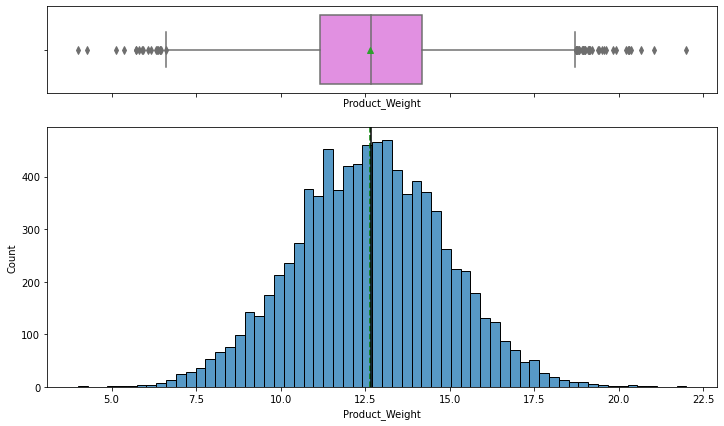

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(data, "Product_Weight")

- The product weight is uniformly distributed with mean and median lying around 12.5.

**Product_Allocated_Area**

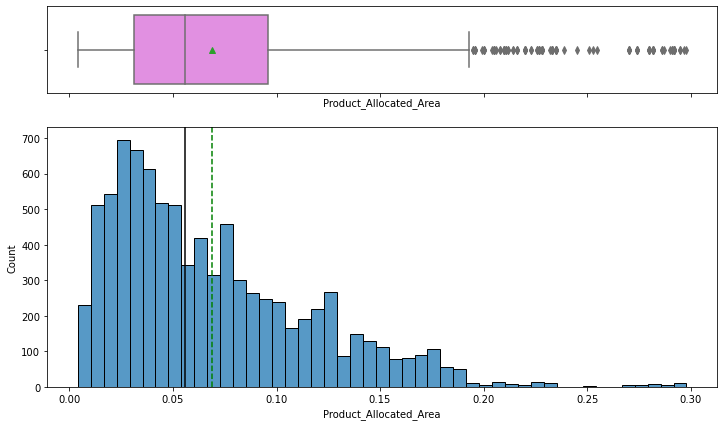

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(data, "Product_Allocated_Area")

- The distribution is right skewed with the median lying around 0.05.

**Product_MRP**

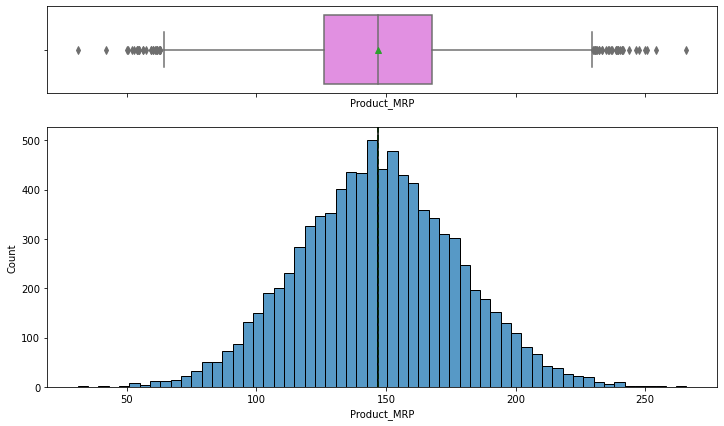

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(data, "Product_MRP")

- The product MRP is uniformly distributed with mean and median lying around 150.

**Product_Store_Sales_Total**

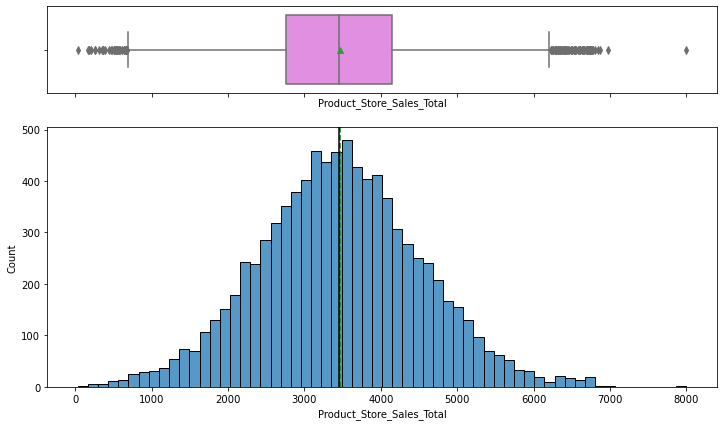

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(data, "Product_Store_Sales_Total")

- The revenue generated from each product at a particular store is uniformly distributed with mean and median lying around 3500.

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

**Product_Sugar_Content**

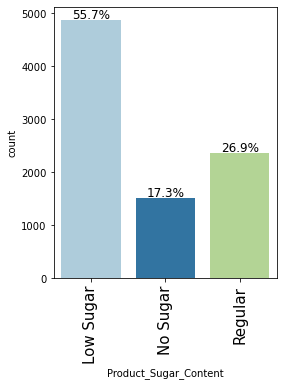

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(data, "Product_Sugar_Content", perc=True)

- Around 56% of the products are having low sugar followed by 27% products which are having regular sugar content.

**Product_Type**

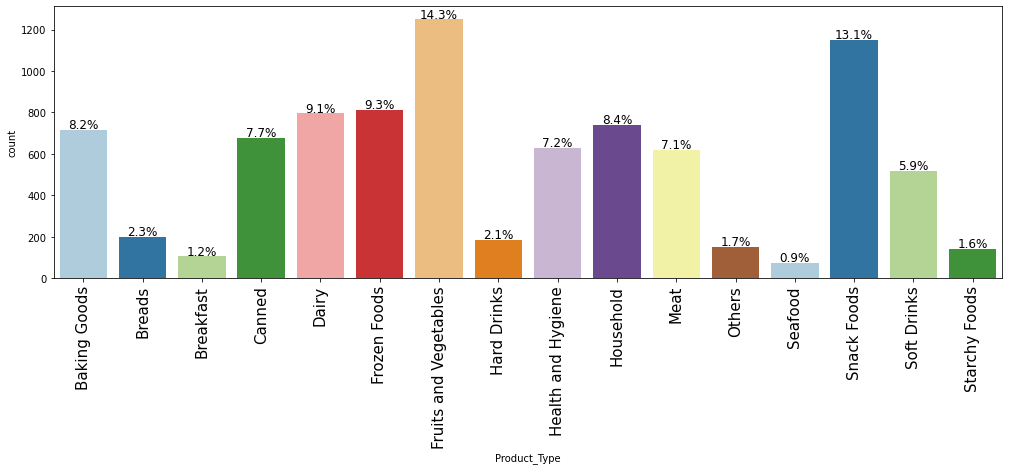

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(data, "Product_Type", perc=True)

**Observations**
- Fruits and vegetables (14%) and Snack Foods (13%) have been bought the highest number of times from all the stores combined.
- Seafood (1%) has been bought the lowest number of times.

**Store_Id**

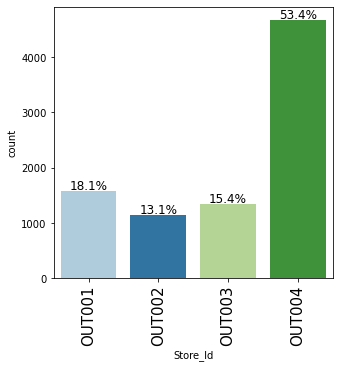

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(data, "Store_Id", perc=True)

- Around 53% of the products are being sold from outlet OUT004. Almost equal number of products have been sold from the other three stores each.

**Store_Size**

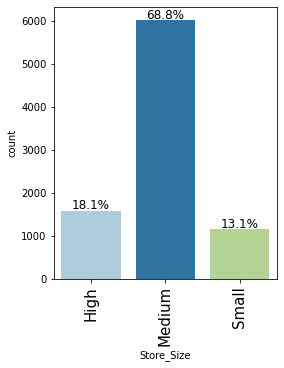

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(data, "Store_Size", perc=True)

- Around 69% of the products have been sold from the stores which are medium in size

**Store_Location_City_Type**

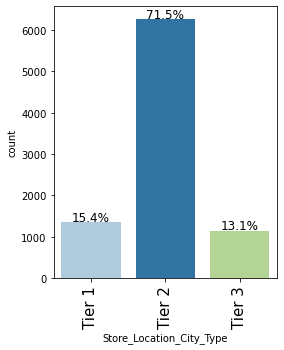

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(data, "Store_Location_City_Type", perc=True)

- Around 72% of the products have been sold from the stores which are located in the Tier 2 cities.

**Store_Type**

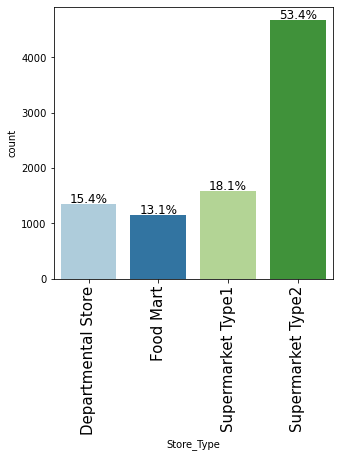

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(data, "Store_Type", perc=True)

- Around 53% of the products have been sold from stores which are of Supermarket Type2.

### Bivariate Analysis

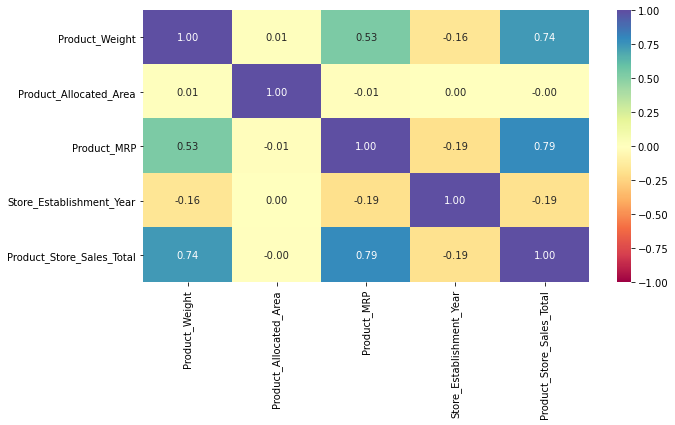

<IPython.core.display.Javascript object>

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations**
- Product weight and product MRP are highly correlated with our target variable i.e Product_Store_Sales_Total
- Product weight and product MRP are moderately correlated with each other.
- There is not much correlation among the rest of the variables.

**Let's check the distribution of our target variable i.e Product_Store_Sales_Total with the numeric columns** 

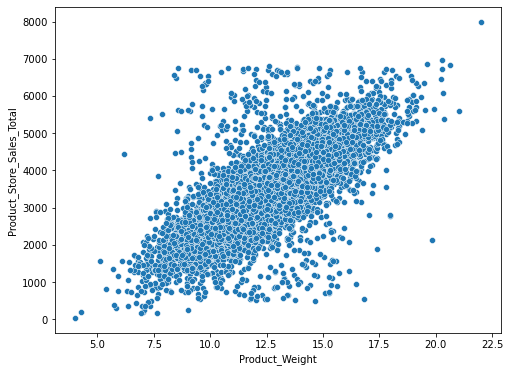

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=[8, 6])
sns.scatterplot(x=data.Product_Weight, y=data.Product_Store_Sales_Total)
plt.show()

- Product_Weight and Product_Store_Sales_Total are almost linearly correlated with each other.  

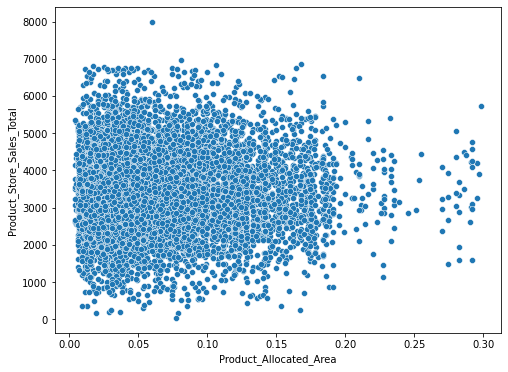

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=[8, 6])
sns.scatterplot(x=data.Product_Allocated_Area, y=data.Product_Store_Sales_Total)
plt.show()

- There seem to be no relationship between Product_Allocated_Area and Product_Store_Sales_Total.

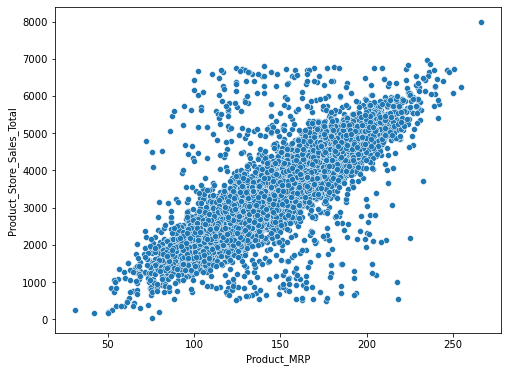

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=[8, 6])
sns.scatterplot(x=data.Product_MRP, y=data.Product_Store_Sales_Total)
plt.show()

- Product_MRP and Product_Store_Sales_Total are almost linearly correlated with each other.

**Let us see from which product type the company is generating most of the revenue**

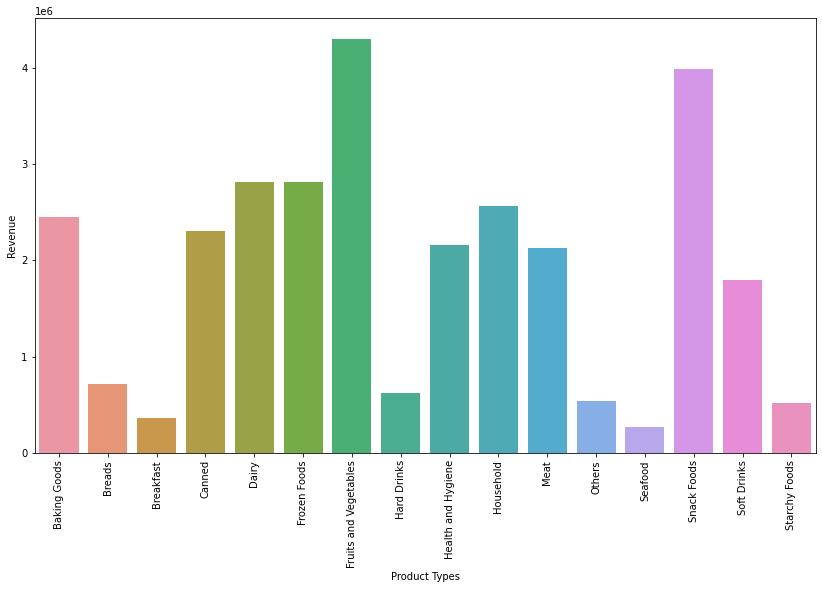

<IPython.core.display.Javascript object>

In [ ]:
df_revenue1 = data.groupby(["Product_Type"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
a = sns.barplot(x=df_revenue1.Product_Type, y=df_revenue1.Product_Store_Sales_Total)
a.set_xlabel("Product Types")
a.set_ylabel("Revenue")
plt.show()

- Fruits and vegetables and snack foods are the biggest contributors to the revenue of the company(SuperKart).

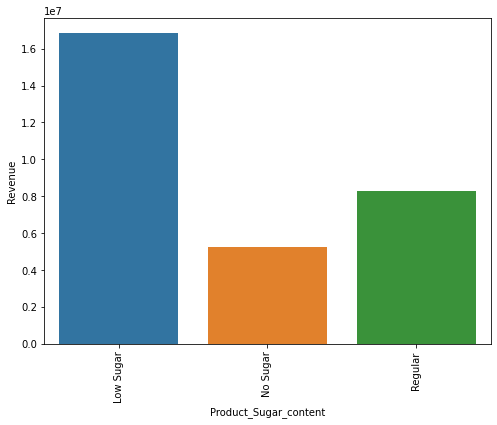

<IPython.core.display.Javascript object>

In [ ]:
df_revenue2 = data.groupby(["Product_Sugar_Content"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()
plt.figure(figsize=[8, 6])
plt.xticks(rotation=90)
b = sns.barplot(
    x=df_revenue2.Product_Sugar_Content, y=df_revenue2.Product_Store_Sales_Total
)
b.set_xlabel("Product_Sugar_content")
b.set_ylabel("Revenue")
plt.show()

- Low sugar content materials are the biggest contributors to the revenue of the company(SuperKart).

**Let us see from which type of stores and locations the revenue generation is more**.

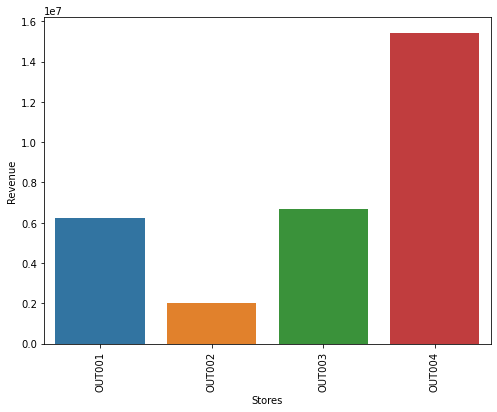

<IPython.core.display.Javascript object>

In [ ]:
df_store_revenue = data.groupby(["Store_Id"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()
plt.figure(figsize=[8, 6])
plt.xticks(rotation=90)
r = sns.barplot(
    x=df_store_revenue.Store_Id, y=df_store_revenue.Product_Store_Sales_Total
)
r.set_xlabel("Stores")
r.set_ylabel("Revenue")
plt.show()

- OUTOO4 is contributing the most to the revenue of the company which is more than double of the contribution being made by second-placed store OUT003.

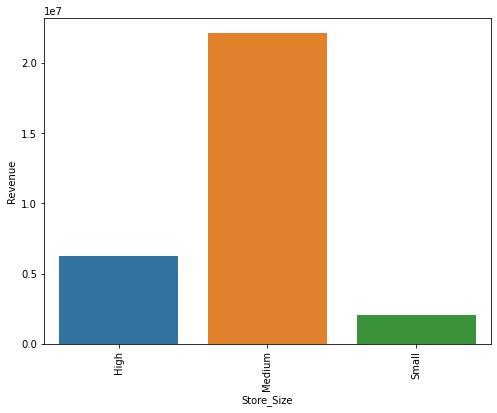

<IPython.core.display.Javascript object>

In [ ]:
df_revenue3 = data.groupby(["Store_Size"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()
plt.figure(figsize=[8, 6])
plt.xticks(rotation=90)
c = sns.barplot(x=df_revenue3.Store_Size, y=df_revenue3.Product_Store_Sales_Total)
c.set_xlabel("Store_Size")
c.set_ylabel("Revenue")
plt.show()

- The medium sized stores are contributing heavily to the revenue. 

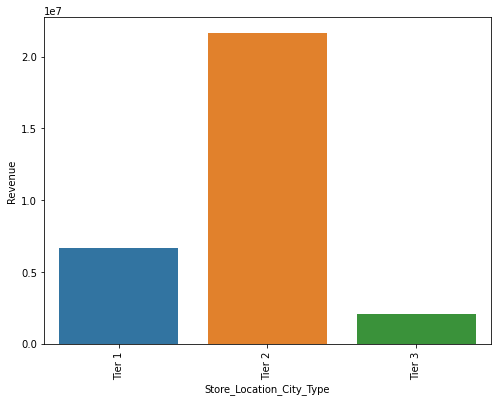

<IPython.core.display.Javascript object>

In [ ]:
df_revenue4 = data.groupby(["Store_Location_City_Type"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()
plt.figure(figsize=[8, 6])
plt.xticks(rotation=90)
d = sns.barplot(
    x=df_revenue4.Store_Location_City_Type, y=df_revenue4.Product_Store_Sales_Total
)
d.set_xlabel("Store_Location_City_Type")
d.set_ylabel("Revenue")
plt.show()

- Stores in the Tier 2 cities are contributing the most to the revenue of SuperKart.

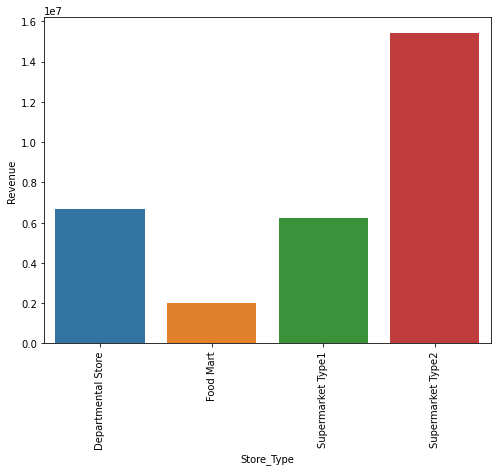

<IPython.core.display.Javascript object>

In [ ]:
df_revenue5 = data.groupby(["Store_Type"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()
plt.figure(figsize=[8, 6])
plt.xticks(rotation=90)
e = sns.barplot(x=df_revenue5.Store_Type, y=df_revenue5.Product_Store_Sales_Total)
e.set_xlabel("Store_Type")
e.set_ylabel("Revenue")
plt.show()

- Stores of Supermarket Type 2 are performing exceptionally well.

**Let's check the distribution of our target variable i.e Product_Store_Sales_Total with the other categorical columns**

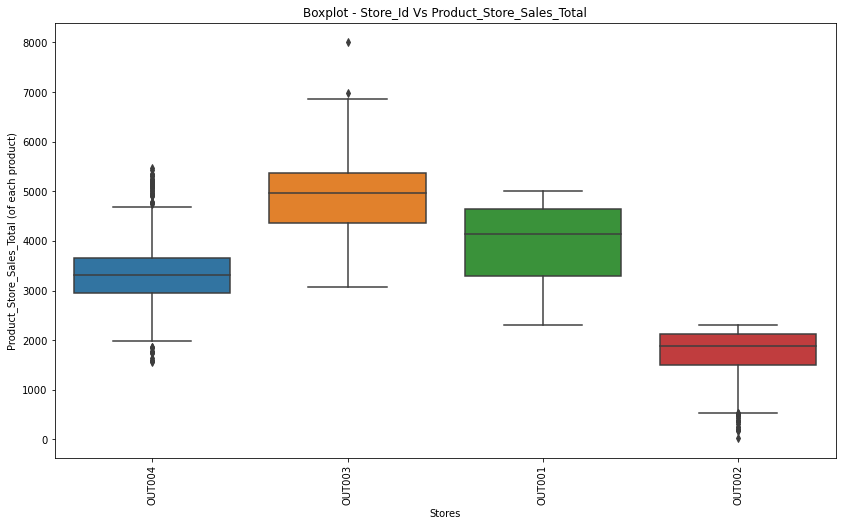

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=[14, 8])
sns.boxplot(data.Store_Id, data.Product_Store_Sales_Total)
plt.xticks(rotation=90)
plt.title("Boxplot - Store_Id Vs Product_Store_Sales_Total")
plt.xlabel("Stores")
plt.ylabel("Product_Store_Sales_Total (of each product)")
plt.show()

- Although the number of products bought from OUT003 is around 15% only, however more costly goods have been bought from this store than the other stores. This shows that this is a premium store for the company. 

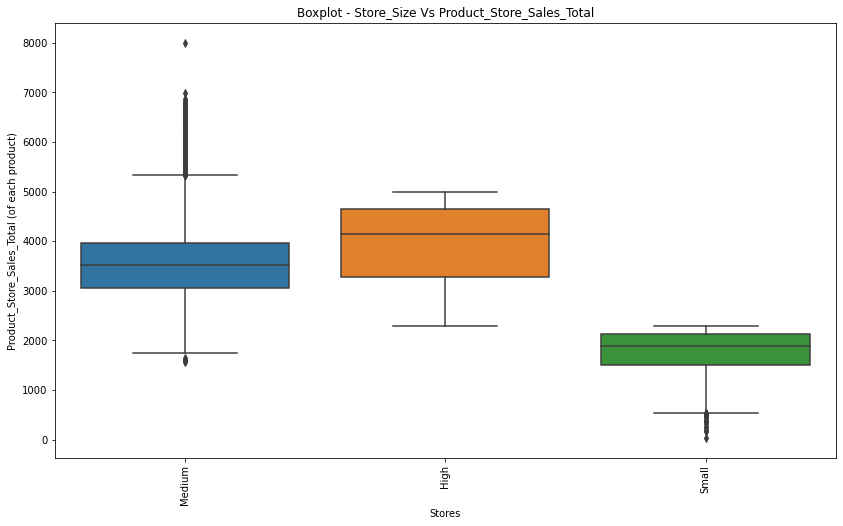

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=[14, 8])
sns.boxplot(data.Store_Size, data.Product_Store_Sales_Total)
plt.xticks(rotation=90)
plt.title("Boxplot - Store_Size Vs Product_Store_Sales_Total")
plt.xlabel("Stores")
plt.ylabel("Product_Store_Sales_Total (of each product)")
plt.show()

- More costly goods have been bought from the stores which are high in size which seems to be quite logical.

**Let's now try to find out some relationship between the other columns**

**Generally certain product types will have higher product weight than others. Let's have a look.**

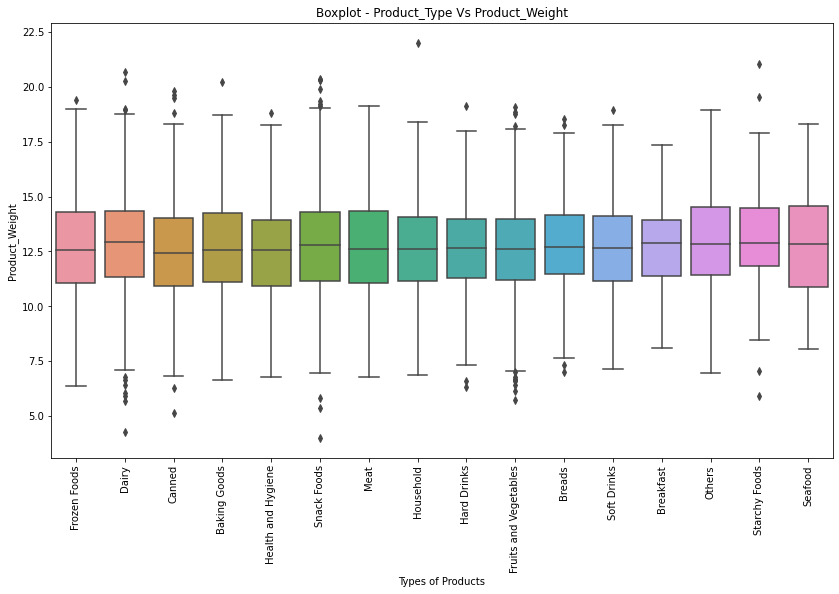

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=[14, 8])
sns.boxplot(data.Product_Type, data.Product_Weight)
plt.xticks(rotation=90)
plt.title("Boxplot - Product_Type Vs Product_Weight")
plt.xlabel("Types of Products")
plt.ylabel("Product_Weight")
plt.show()

- The median weight of all the product types is almost equal. Each product type contains different items whose weight ranges from low to high, therefore the overall weight of the product category gets averaged out.

**Let's find out whether there is some relationship between the weight of the product and its sugar content**

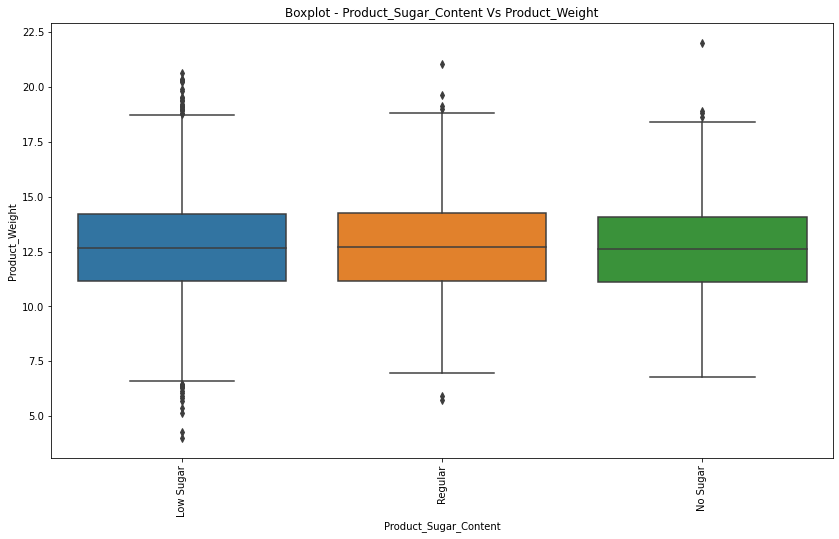

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=[14, 8])
sns.boxplot(data.Product_Sugar_Content, data.Product_Weight)
plt.xticks(rotation=90)
plt.title("Boxplot - Product_Sugar_Content Vs Product_Weight")
plt.xlabel("Product_Sugar_Content")
plt.ylabel("Product_Weight")
plt.show()

- The median weight of all the products across the 3 categories is almost the same.

**Let's analyze the sugar content of different product types**

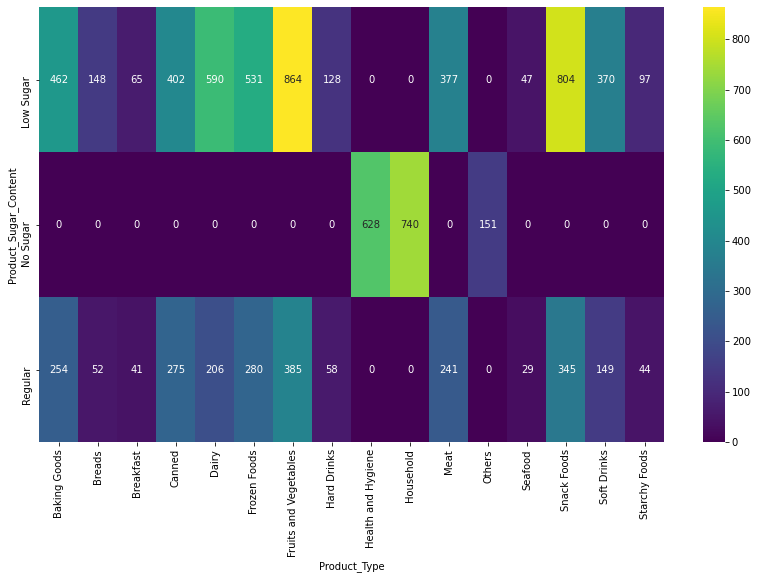

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(14, 8))
sns.heatmap(
    pd.crosstab(data["Product_Sugar_Content"], data["Product_Type"]),
    annot=True,
    fmt="g",
    cmap="viridis",
)
plt.ylabel("Product_Sugar_Content")
plt.xlabel("Product_Type")
plt.show()

- Health and hygiene, household and others are the only categories which have no sugar in them.

**Let's find out how many items of each product type has been sold in each of the stores**

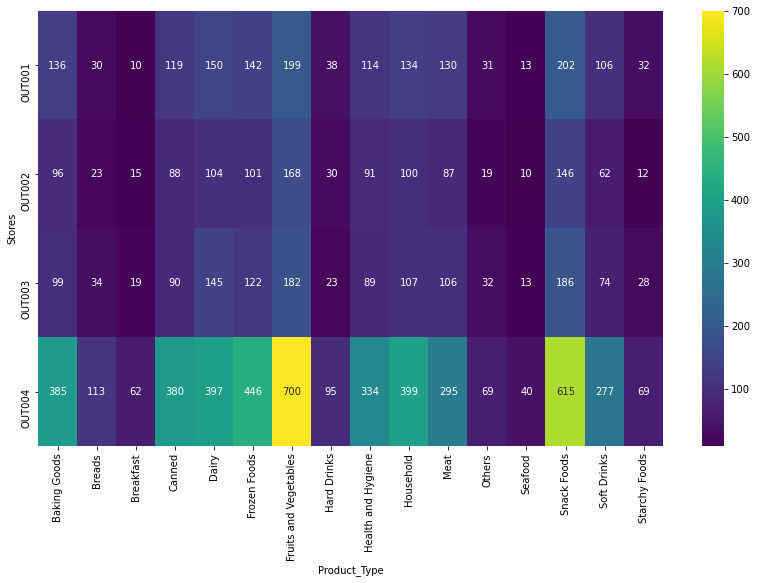

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(14, 8))
sns.heatmap(
    pd.crosstab(data["Store_Id"], data["Product_Type"]),
    annot=True,
    fmt="g",
    cmap="viridis",
)
plt.ylabel("Stores")
plt.xlabel("Product_Type")
plt.show()

**Observations**
- Fruits and vegetables have been sold the most across all the stores followed by snack foods.
- Seafood is the least bought product type across all the stores

**Different product types have different prices. Let's analyze the trend.**

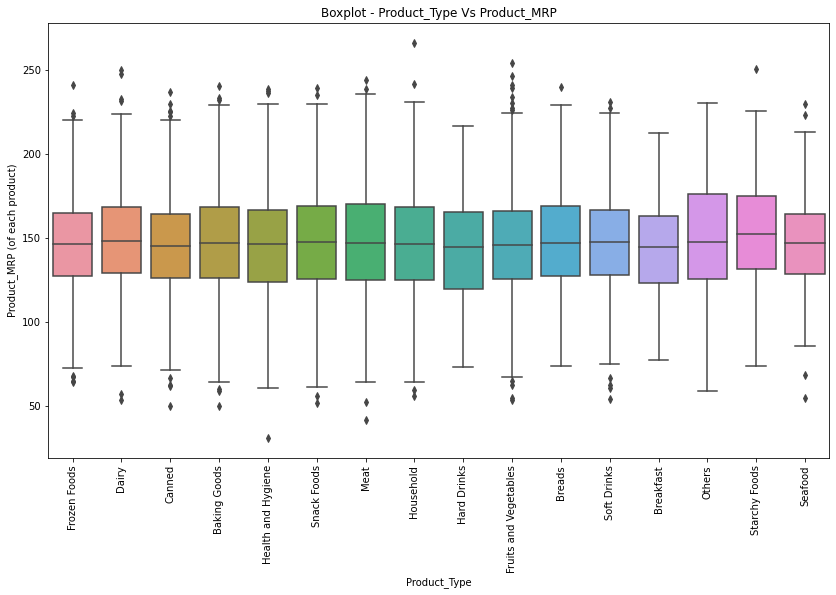

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=[14, 8])
sns.boxplot(data.Product_Type, data.Product_MRP)
plt.xticks(rotation=90)
plt.title("Boxplot - Product_Type Vs Product_MRP")
plt.xlabel("Product_Type")
plt.ylabel("Product_MRP (of each product)")
plt.show()

- The median MRPs of all the product types are almost equal. Each product type contains differrent items whose price ranges from low to high, therefore the overall MRP of the product category gets averaged out.

**Let's find out how the Product_MRP varies with the different stores**

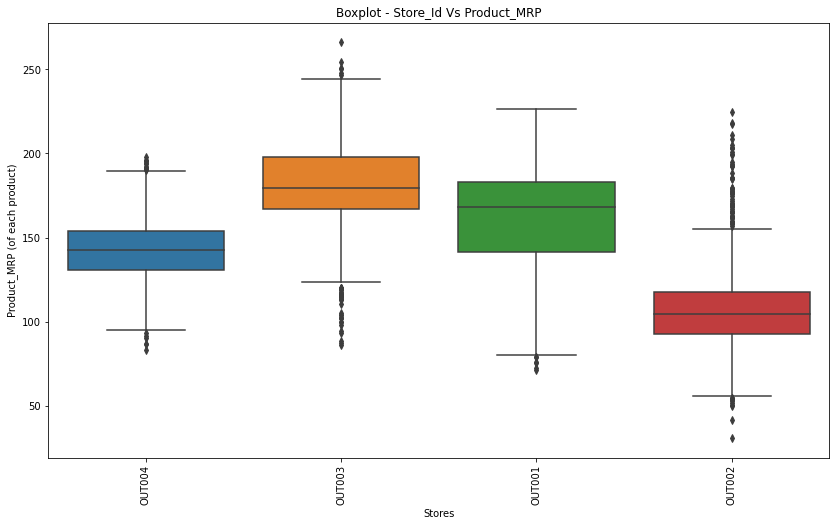

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=[14, 8])
sns.boxplot(data.Store_Id, data.Product_MRP)
plt.xticks(rotation=90)
plt.title("Boxplot - Store_Id Vs Product_MRP")
plt.xlabel("Stores")
plt.ylabel("Product_MRP (of each product)")
plt.show()

- As we have seen earlier OUT003, being a premium store, has more costly items that the rest of the stores.

**Let's delve deeper and do a detailed analysis of each of the stores**.

#### OUT001

In [ ]:
data.loc[data["Store_Id"] == "OUT001"].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Weight,1586,NaN,NaN,NaN,13.4589,2.06497,6.16,12.0525,13.96,14.95,17.97
Product_Sugar_Content,1586,3,Low Sugar,845,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,1586,NaN,NaN,NaN,0.068768,0.0471307,0.004,0.033,0.0565,0.094,0.295
Product_Type,1586,16,Snack Foods,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,1586,NaN,NaN,NaN,160.514,30.3591,71.35,141.72,168.32,182.937,226.59
Store_Id,1586,1,OUT001,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,1586,NaN,NaN,NaN,1987,0,1987,1987,1987,1987,1987
Store_Size,1586,1,High,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,1586,1,Tier 2,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Type,1586,1,Supermarket Type1,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

**Observations**
- OUT001 is a store of Supermarket Type 1 which is located in a Tier 2 city and has store size as high. It was established in 1987.
- OUT001 has sold products whose MRP range from 71 to 227.
- Snack Foods have been sold the highest number of times in OUT001.
- The revenue generated from each product at OUT001 ranges from 2300 to 5000.

In [ ]:
data.loc[data["Store_Id"] == "OUT001", "Product_Store_Sales_Total"].sum()

6223113.18

<IPython.core.display.Javascript object>

**OUT001 has generated total revenue of 6223113 from the sales of goods.**

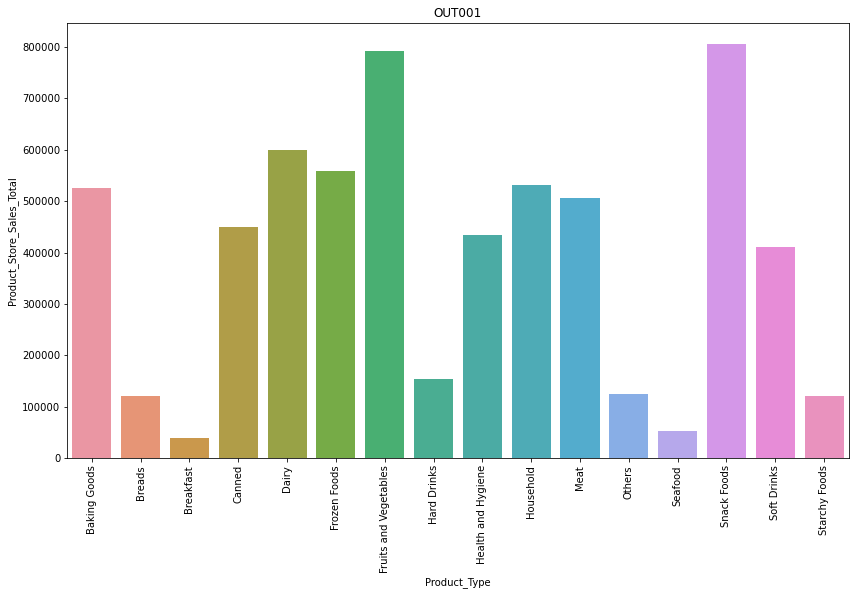

<IPython.core.display.Javascript object>

In [ ]:
df_OUT001 = (
    data.loc[data["Store_Id"] == "OUT001"]
    .groupby(["Product_Type"], as_index=False)["Product_Store_Sales_Total"]
    .sum()
)
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
plt.xlabel("Product_Type")
plt.ylabel("Product_Store_Sales_Total")
plt.title("OUT001")
sns.barplot(x=df_OUT001.Product_Type, y=df_OUT001.Product_Store_Sales_Total)
plt.show()

- OUT001 has generated the highest revenue from the sale of fruits and vegetables and snack foods. Both the categories have contributed around 800000 each.

#### OUT002

In [ ]:
data.loc[data["Store_Id"] == "OUT002"].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Weight,1152,NaN,NaN,NaN,9.91124,1.79985,4,8.7675,9.795,10.89,19.82
Product_Sugar_Content,1152,3,Low Sugar,658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,1152,NaN,NaN,NaN,0.0677474,0.0475666,0.006,0.031,0.0545,0.09525,0.292
Product_Type,1152,16,Fruits and Vegetables,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,1152,NaN,NaN,NaN,107.081,24.9123,31,92.8275,104.675,117.817,224.93
Store_Id,1152,1,OUT002,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,1152,NaN,NaN,NaN,1998,0,1998,1998,1998,1998,1998
Store_Size,1152,1,Small,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,1152,1,Tier 3,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Type,1152,1,Food Mart,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

**Observations**
- OUT002 is a food mart which is located in a Tier 3 city and has store size as small. It was established in 1998.
- OUT002 has sold products whose MRP range from 31 to 225.
- Fruits and vegetables have been sold the highest number of times in OUT002.
- The revenue generated from each product at OUT002 ranges from 33 to 2300.

In [ ]:
data.loc[data["Store_Id"] == "OUT002", "Product_Store_Sales_Total"].sum()

2030909.72

<IPython.core.display.Javascript object>

**OUT002 has generated total revenue of 2030910 from the sales of goods.**

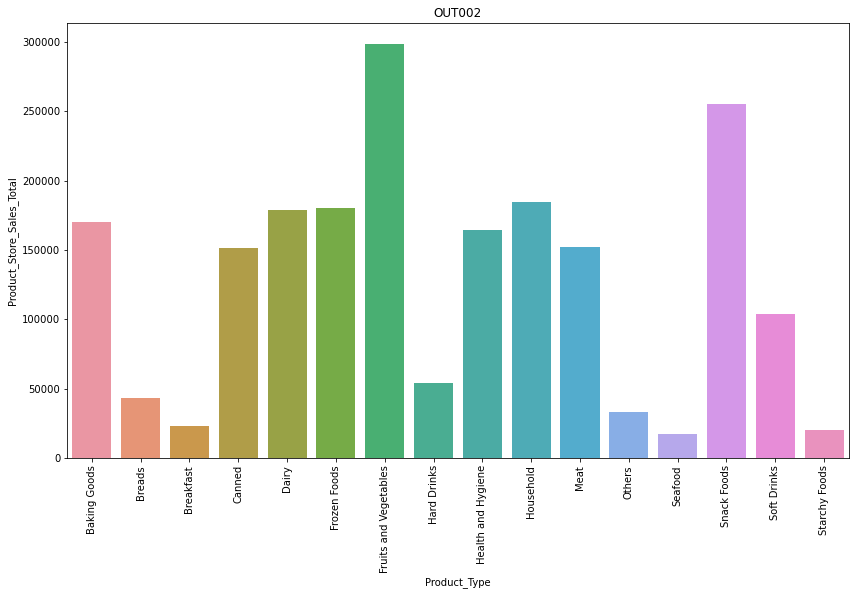

<IPython.core.display.Javascript object>

In [ ]:
df_OUT002 = (
    data.loc[data["Store_Id"] == "OUT002"]
    .groupby(["Product_Type"], as_index=False)["Product_Store_Sales_Total"]
    .sum()
)
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
plt.xlabel("Product_Type")
plt.ylabel("Product_Store_Sales_Total")
plt.title("OUT002")
sns.barplot(x=df_OUT002.Product_Type, y=df_OUT002.Product_Store_Sales_Total)
plt.show()

- OUT002 has generated the highest revenue from the sale of fruits and vegetables (~ 300000) followed by snack foods (~ 250000).

#### OUT003

In [ ]:
data.loc[data["Store_Id"] == "OUT003"].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Weight,1349,NaN,NaN,NaN,15.1037,1.89353,7.35,14.02,15.18,16.35,22
Product_Sugar_Content,1349,3,Low Sugar,750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,1349,NaN,NaN,NaN,0.0686368,0.0487076,0.004,0.031,0.057,0.094,0.298
Product_Type,1349,16,Snack Foods,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,1349,NaN,NaN,NaN,181.359,24.7964,85.88,166.92,179.67,198.07,266
Store_Id,1349,1,OUT003,1349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,1349,NaN,NaN,NaN,1999,0,1999,1999,1999,1999,1999
Store_Size,1349,1,Medium,1349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,1349,1,Tier 1,1349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Type,1349,1,Departmental Store,1349,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

**Observations**
- OUT003 is a Departmental store which is located in a Tier 1 city and has store size as medium. It was established in 1999.
- OUT003 has sold products whose MRP range from 86 to 266.
- Snack Foods have been sold the highest number of times in OUT003.
- The revenue generated from each product at OUT003 ranges from 3070 to 8000.

In [ ]:
data.loc[data["Store_Id"] == "OUT003", "Product_Store_Sales_Total"].sum()

6673457.57

<IPython.core.display.Javascript object>

**OUT003 has generated total revenue of 6673458 from the sales of goods.**

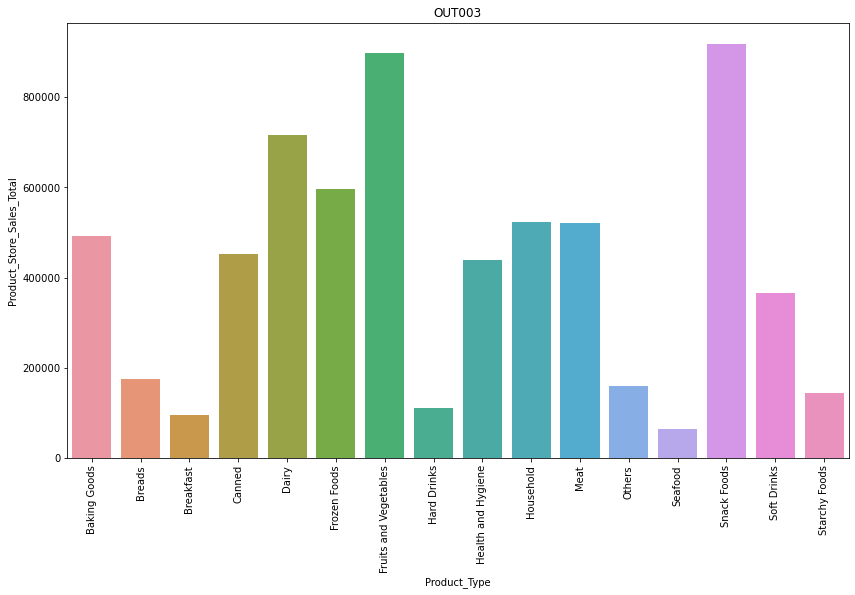

<IPython.core.display.Javascript object>

In [ ]:
df_OUT003 = (
    data.loc[data["Store_Id"] == "OUT003"]
    .groupby(["Product_Type"], as_index=False)["Product_Store_Sales_Total"]
    .sum()
)
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
plt.xlabel("Product_Type")
plt.ylabel("Product_Store_Sales_Total")
plt.title("OUT003")
sns.barplot(x=df_OUT003.Product_Type, y=df_OUT003.Product_Store_Sales_Total)
plt.show()

- OUT003 has generated the highest revenue from the sale of snack foods followed by fruits and vegetables, both the categories contributing around 800000 each.

#### OUT004

In [ ]:
data.loc[data["Store_Id"] == "OUT004"].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Weight,4676,NaN,NaN,NaN,12.3496,1.4282,7.34,11.37,12.37,13.3025,17.79
Product_Sugar_Content,4676,3,Low Sugar,2632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,4676,NaN,NaN,NaN,0.0690917,0.0485835,0.004,0.031,0.056,0.097,0.297
Product_Type,4676,16,Fruits and Vegetables,700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,4676,NaN,NaN,NaN,142.4,17.514,83.04,130.54,142.82,154.192,197.66
Store_Id,4676,1,OUT004,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,4676,NaN,NaN,NaN,2009,0,2009,2009,2009,2009,2009
Store_Size,4676,1,Medium,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,4676,1,Tier 2,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Type,4676,1,Supermarket Type2,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

**Observations**
- OUT004 is a store of Supermarket Type2 which is located in a Tier 2 city and has store size as medium. It was established in 2009.
- OUT004 has sold products whose MRP range from 83 to 198.
- Fruits and vegetables have been sold the highest number of times in OUT004.
- The revenue generated from each product at OUT004 ranges from 1561 to 5463.

In [ ]:
data.loc[data["Store_Id"] == "OUT004", "Product_Store_Sales_Total"].sum()

15427583.43

<IPython.core.display.Javascript object>

**OUT004 has generated total revenue of 15427583 from the sales of goods which is highest among all the 4 stores.**

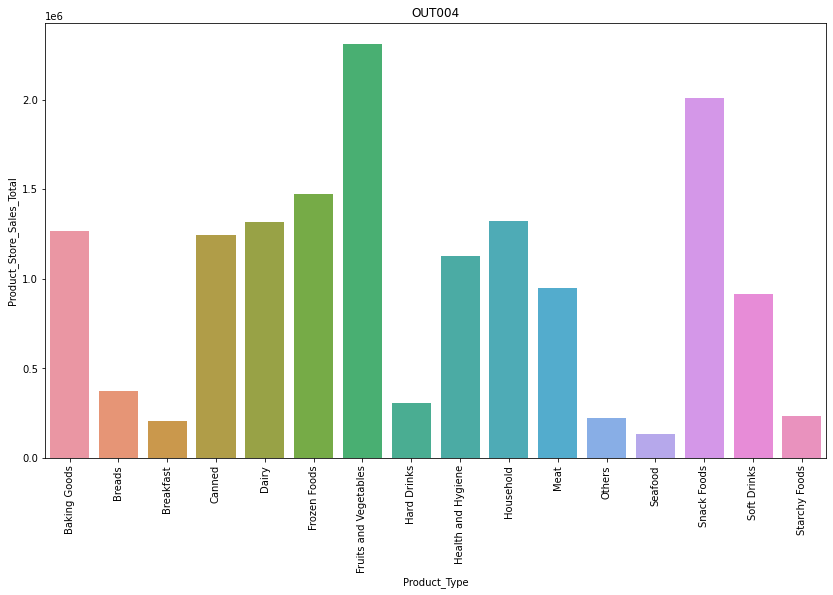

<IPython.core.display.Javascript object>

In [ ]:
df_OUT004 = (
    data.loc[data["Store_Id"] == "OUT004"]
    .groupby(["Product_Type"], as_index=False)["Product_Store_Sales_Total"]
    .sum()
)
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
plt.xlabel("Product_Type")
plt.ylabel("Product_Store_Sales_Total")
plt.title("OUT004")
sns.barplot(x=df_OUT004.Product_Type, y=df_OUT004.Product_Store_Sales_Total)
plt.show()

- OUT004 has generated the highest revenue from the sale of fruits and vegetables (~ 2500000) followed by snack foods (~ 2000000).

**Let's find out the revenue generated by the stores from each of the product types**.

In [ ]:
df1 = data.groupby(["Product_Type", "Store_Id"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()
df1

,Product_Type,Store_Id,Product_Store_Sales_Total
0,Baking Goods,OUT001,525131.04
1,Baking Goods,OUT002,169860.50
2,Baking Goods,OUT003,491908.20
3,Baking Goods,OUT004,1266086.26
4,Breads,OUT001,121274.09
5,Breads,OUT002,43419.47
6,Breads,OUT003,175391.93
7,Breads,OUT004,374856.75
8,Breakfast,OUT001,38161.10
9,Breakfast,OUT002,23396.10


<IPython.core.display.Javascript object>

- In all the product types, the revenue generated by OUT004 has been the highest which seems quite logical since around 53% of the total products were brought from this store.
- In all the product categories, the revenue generated by OUT002 has been the lowest which seems quite obvious since it is small store in a Tier 3 city.

**Let's find out the revenue generated by the stores from products having different levels of sugar content**.

In [ ]:
df2 = data.groupby(["Product_Sugar_Content", "Store_Id"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()
df2

,Product_Sugar_Content,Store_Id,Product_Store_Sales_Total
0,Low Sugar,OUT001,3300834.93
1,Low Sugar,OUT002,1156758.85
2,Low Sugar,OUT003,3706903.24
3,Low Sugar,OUT004,8658908.78
4,No Sugar,OUT001,1090353.78
5,No Sugar,OUT002,382162.19
6,No Sugar,OUT003,1123084.57
7,No Sugar,OUT004,2674343.14
8,Regular,OUT001,1831924.47
9,Regular,OUT002,491988.68


<IPython.core.display.Javascript object>

- The trend is the same as that which was present in the revenue analysis of stores for product types.

## Feature Engineering

**A store which has been in the business for a long duration is more trustworthy than the newly established ones. On the other hand, older stores may sometimes lack infrastructure if proper attention is not given. So let us calculate the current age of the store and incorporate that in our model.** 

In [ ]:
# Outlet Age
data["Store_Age_Years"] = 2021 - data.Store_Establishment_Year

<IPython.core.display.Javascript object>

**We have 16 different product types in our dataset. So let us make two broad categories, perishables and non perishables, in order to reduce the number of product types.**

In [ ]:
perishables = [
    "Dairy",
    "Meat",
    "Fruits and Vegetables",
    "Breakfast",
    "Breads",
    "Seafood",
]

<IPython.core.display.Javascript object>

In [ ]:
def change(x):
    if x in perishables:
        return "Perishables"
    else:
        return "Non Perishables"


data.Product_Type.apply(change)

0       Non Perishables
1           Perishables
2       Non Perishables
3       Non Perishables
4       Non Perishables
             ...       
8758    Non Perishables
8759    Non Perishables
8760    Non Perishables
8761    Non Perishables
8762    Non Perishables
Name: Product_Type, Length: 8763, dtype: object

<IPython.core.display.Javascript object>

In [ ]:
change1 = []
for i in range(0, len(data)):
    if data.Product_Type[i] in perishables:
        change1.append("Perishables")
    else:
        change1.append("Non Perishables")

<IPython.core.display.Javascript object>

In [ ]:
data["Product_Type_Category"] = pd.Series(change1)

<IPython.core.display.Javascript object>

In [ ]:
data.head()

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char,Store_Age_Years,Product_Type_Category
0,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD,12,Non Perishables
1,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD,22,Perishables
2,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD,34,Non Perishables
3,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD,34,Non Perishables
4,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC,23,Non Perishables


<IPython.core.display.Javascript object>

### Outlier Check

- Let's check for outliers in the data.

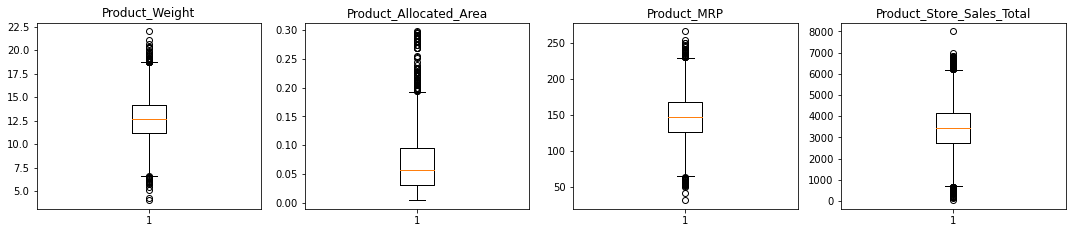

<IPython.core.display.Javascript object>

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("Store_Establishment_Year")
numeric_columns.remove("Store_Age_Years")


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations**

- There are quite a few outliers in the data.
- However, we will not treat them as they are proper values.

### Data Preparation for modeling

- We want to forecast the Product_Store_Sales_Total. 
- Before we proceed to build a model, we'll have to encode categorical features and drop the unnecessary columns
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [ ]:
data.head()

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char,Store_Age_Years,Product_Type_Category
0,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD,12,Non Perishables
1,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD,22,Perishables
2,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD,34,Non Perishables
3,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD,34,Non Perishables
4,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC,23,Non Perishables


<IPython.core.display.Javascript object>

In [ ]:
data = data.drop(["Product_Type", "Store_Id", "Store_Establishment_Year"], axis=1)

<IPython.core.display.Javascript object>

In [ ]:
data.shape

(8763, 11)

<IPython.core.display.Javascript object>

In [ ]:
data = pd.get_dummies(
    data,
    columns=data.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

<IPython.core.display.Javascript object>

In [ ]:
data.head()

,Product_Weight,Product_Allocated_Area,Product_MRP,Product_Store_Sales_Total,Store_Age_Years,Product_Sugar_Content_No Sugar,Product_Sugar_Content_Regular,Store_Size_Medium,Store_Size_Small,Store_Location_City_Type_Tier 2,Store_Location_City_Type_Tier 3,Store_Type_Food Mart,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2,Product_Id_char_FD,Product_Id_char_NC,Product_Type_Category_Perishables
0,12.66,0.027,117.08,2842.40,12,0,0,1,0,1,0,0,0,1,1,0,0
1,16.54,0.144,171.43,4830.02,22,0,0,1,0,0,0,0,0,0,1,0,1
2,14.28,0.031,162.08,4130.16,34,0,1,0,0,1,0,0,1,0,1,0,0
3,12.10,0.112,186.31,4132.18,34,0,0,0,0,1,0,0,1,0,1,0,0
4,9.57,0.010,123.67,2279.36,23,1,0,0,1,0,1,1,0,0,0,1,0


<IPython.core.display.Javascript object>

In [ ]:
# Separating features and the target column
X = data.drop("Product_Store_Sales_Total", axis=1)
y = data["Product_Store_Sales_Total"]

<IPython.core.display.Javascript object>

In [ ]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, shuffle=True
)

<IPython.core.display.Javascript object>

In [ ]:
X_train.shape, X_test.shape

((6134, 16), (2629, 16))

<IPython.core.display.Javascript object>

## Building Models

- We'll fit different models on the train data and observe their performance. 
- We'll try to improve that performance by tuning some hyperparameters available for that algorithm.
- We'll use GridSearchCv for hyperparameter tuning and `r_2 score` to optimize the model.
- R-square - `Coefficient of determination` is used to evaluate the performance of a regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variables.
- Let's start by creating a function to get model scores, so that we don't have to use the same codes repeatedly.

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [ ]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_r2 = metrics.r2_score(y_train, pred_train)
    test_r2 = metrics.r2_score(y_test, pred_test)
    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, pred_train))
    test_rmse = np.sqrt(metrics.mean_squared_error(y_test, pred_test))

    # Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))

    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True:
        print("R-sqaure on training set : ", metrics.r2_score(y_train, pred_train))
        print("R-square on test set : ", metrics.r2_score(y_test, pred_test))
        print(
            "RMSE on training set : ",
            np.sqrt(metrics.mean_squared_error(y_train, pred_train)),
        )
        print(
            "RMSE on test set : ",
            np.sqrt(metrics.mean_squared_error(y_test, pred_test)),
        )

    # returning the list with train and test scores
    return score_list

<IPython.core.display.Javascript object>

## Decision Tree Model

In [ ]:
dtree = DecisionTreeRegressor(random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

<IPython.core.display.Javascript object>

#### Checking model performance on training set

In [ ]:
dtree_model_train_perf = model_performance_regression(dtree, X_train, y_train)
dtree_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.0,0.0,1.0,1.0,0.0


<IPython.core.display.Javascript object>

#### Checking model performance on test set

In [ ]:
dtree_model_test_perf = model_performance_regression(dtree, X_test, y_test)
dtree_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,379.995661,133.530475,0.873818,0.873045,5.643041


<IPython.core.display.Javascript object>

- The Decision tree model with default parameters is overfitting the train data.
- Let's see if we can reduce overfitting and improve performance on test data by tuning hyperparameters.

### Hyperparameter Tuning - Decision Tree

In [ ]:
# Choose the type of classifier.
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": list(np.arange(1, 9)) + [None],
    "min_samples_leaf": [1, 3, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10, 15] + [None],
    "min_impurity_decrease": [0.001, 0.01, 0.1, 0.0],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_tuned.fit(X_train, y_train)

DecisionTreeRegressor(min_impurity_decrease=0.001, min_samples_leaf=10,
                      random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

In [ ]:
dtree_tuned_model_train_perf = model_performance_regression(
    dtree_tuned, X_train, y_train
)
dtree_tuned_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,249.397536,109.744032,0.945029,0.944885,3.878205


<IPython.core.display.Javascript object>

#### Checking model performance on test set

In [ ]:
dtree_tuned_model_test_perf = model_performance_regression(dtree_tuned, X_test, y_test)
dtree_tuned_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,323.125144,142.708062,0.908761,0.908202,6.200516


<IPython.core.display.Javascript object>

- The overfitting is reduced after hyperparameter tuning and the test score has increased by approx 3.5%.
- RMSE is also reduced on test data and the model is generalizing better than the decision tree model with default parameters.

### Bagging Regressor

In [ ]:
bagging_regressor = BaggingRegressor(random_state=1)
bagging_regressor.fit(X_train, y_train)

BaggingRegressor(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

In [ ]:
bagging_regressor_model_train_perf = model_performance_regression(
    bagging_regressor, X_train, y_train
)
bagging_regressor_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,117.167143,43.816068,0.987867,0.987836,1.562609


<IPython.core.display.Javascript object>

#### Checking model performance on test set

In [ ]:
bagging_regressor_model_test_perf = model_performance_regression(
    bagging_regressor, X_test, y_test
)
bagging_regressor_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,304.844771,118.595111,0.918792,0.918295,5.053885


<IPython.core.display.Javascript object>

* The bagging regressor is overfitting on the training set like decision tree model.
* We'll try to reduce overfitting and improve the performance by hyperparameter tuning.

### Hyperparameter Tuning - Bagging Regressor

In [ ]:
# Choose the type of regressor.
bagging_estimator_tuned = BaggingRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8, 0.9],
    "max_features": [0.7, 0.8, 0.9],
    "n_estimators": np.arange(90, 120, 10),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingRegressor(max_features=0.9, max_samples=0.8, n_estimators=110,
                 random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

In [ ]:
bagging_estimator_tuned_model_train_perf = model_performance_regression(
    bagging_estimator_tuned, X_train, y_train
)
bagging_estimator_tuned_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,136.866509,76.874323,0.983445,0.983401,2.73651


<IPython.core.display.Javascript object>

#### Checking model performance on test set

In [ ]:
bagging_estimator_tuned_model_test_perf = model_performance_regression(
    bagging_estimator_tuned, X_test, y_test
)
bagging_estimator_tuned_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,315.641223,172.525003,0.912938,0.912405,7.309967


<IPython.core.display.Javascript object>

- There is not much difference in the scores after hyperparameter tuning.

## Random Forest Model

In [ ]:
rf_estimator = RandomForestRegressor(random_state=1)
rf_estimator.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

In [ ]:
rf_estimator_model_train_perf = model_performance_regression(
    rf_estimator, X_train, y_train
)
rf_estimator_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,104.300102,39.574441,0.990386,0.990361,1.400689


<IPython.core.display.Javascript object>

#### Checking model performance on test set

In [ ]:
rf_estimator_model_test_perf = model_performance_regression(
    rf_estimator, X_test, y_test
)
rf_estimator_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,297.962788,112.81755,0.922417,0.921942,5.052624


<IPython.core.display.Javascript object>

- Random forest is giving a good R2 score of 92% on the test data but it is overfitting the train data.
- Let's try to reduce this overfitting by hyperparameter tuning.

### Hyperparameter Tuning - Random Forest

In [ ]:
# Choose the type of classifier.
rf_tuned = RandomForestRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": [4, 6, 8, 10, None],
    "max_features": ["sqrt", "log2", None],
    "n_estimators": [80, 90, 100, 110, 120],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features=None, n_estimators=120,
                      random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

In [ ]:
rf_tuned_model_train_perf = model_performance_regression(rf_tuned, X_train, y_train)
rf_tuned_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,188.115036,75.933695,0.968725,0.968643,2.520534


<IPython.core.display.Javascript object>

#### Checking model performance on test set

In [ ]:
rf_tuned_model_test_perf = model_performance_regression(rf_tuned, X_test, y_test)
rf_tuned_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,292.977435,116.630388,0.924992,0.924532,5.174218


<IPython.core.display.Javascript object>

- No significant change in the R2 score on the test data.
- However the model seems to generalize slightly better than the model with default parameters and the overfitting has also decreased slightly on the train data.

## Boosting Models

### AdaBoost Regressor

In [ ]:
ab_regressor = AdaBoostRegressor(random_state=1)
ab_regressor.fit(X_train, y_train)

AdaBoostRegressor(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

In [ ]:
ab_regressor_model_train_perf = model_performance_regression(
    ab_regressor, X_train, y_train
)
ab_regressor_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,497.628801,394.54116,0.781144,0.780571,13.177457


<IPython.core.display.Javascript object>

#### Checking model performance on test set

In [ ]:
ab_regressor_model_test_perf = model_performance_regression(
    ab_regressor, X_test, y_test
)
ab_regressor_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,517.198801,408.724069,0.766248,0.764816,15.144309


<IPython.core.display.Javascript object>

- AdaBoost is generalizing well but it is giving poor performance, in terms of R2 score as well as RMSE, as compared to the decision tree and random forest models.  

### Hyperparameter Tuning - AdaBoost Regressor

In [ ]:
# Choose the type of classifier.
ab_tuned = AdaBoostRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10, 100, 10),
    "learning_rate": [1, 0.1, 0.5, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
ab_tuned.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.5, n_estimators=10, random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

In [ ]:
ab_tuned_model_train_perf = model_performance_regression(ab_tuned, X_train, y_train)
ab_tuned_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,459.20943,351.379854,0.813633,0.813145,11.890266


<IPython.core.display.Javascript object>

#### Checking model performance on test set

In [ ]:
ab_tuned_model_test_perf = model_performance_regression(ab_tuned, X_test, y_test)
ab_tuned_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,459.20943,351.379854,0.813633,0.813145,11.890266


<IPython.core.display.Javascript object>

- After hyperparameter tuning, the model seems to generalize better and the scores have also increased.
- However, the performance is still poor, in terms of R2 score as well as RMSE, as compared to the decision tree and random forest models.   

### Gradient Boosting Regressor

In [ ]:
gb_estimator = GradientBoostingRegressor(random_state=1)
gb_estimator.fit(X_train, y_train)

GradientBoostingRegressor(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

In [ ]:
gb_estimator_model_train_perf = model_performance_regression(
    gb_estimator, X_train, y_train
)
gb_estimator_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,298.466845,141.704057,0.92127,0.921064,5.065849


<IPython.core.display.Javascript object>

#### Checking model performance on test set

In [ ]:
gb_estimator_model_test_perf = model_performance_regression(
    gb_estimator, X_test, y_test
)
gb_estimator_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,328.082136,155.049788,0.90594,0.905364,6.584112


<IPython.core.display.Javascript object>

- Gradient boosting is generalizing well and giving comparable results with tuned decision tree and random forest models.

### Hyperparameter Tuning - Gradient Boosting Regressor

In [ ]:
# Choose the type of classifier.
gb_tuned = GradientBoostingRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50, 200, 25),
    "subsample": [0.7, 0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "max_depth": [3, 5, 7, 10],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gb_tuned.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=7, max_features=0.7, n_estimators=50,
                          random_state=1, subsample=0.8)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

In [ ]:
gb_tuned_model_train_perf = model_performance_regression(gb_tuned, X_train, y_train)
gb_tuned_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,185.757436,75.118167,0.969504,0.969424,2.413148


<IPython.core.display.Javascript object>

#### Checking model performance on test set

In [ ]:
gb_tuned_model_test_perf = model_performance_regression(gb_tuned, X_test, y_test)
gb_tuned_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,294.745172,117.273807,0.924084,0.923619,5.079314


<IPython.core.display.Javascript object>

- The scores on the test data improved after hyperparameter tuning.
- However, the models seems to generalize less now. 

### XGBoost Regressor

In [ ]:
xgb_estimator = XGBRegressor(random_state=1)
xgb_estimator.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

In [ ]:
xgb_estimator_model_train_perf = model_performance_regression(
    xgb_estimator, X_train, y_train
)
xgb_estimator_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,126.62695,59.533651,0.985829,0.985792,1.98315


<IPython.core.display.Javascript object>

#### Checking model performance on test set

In [ ]:
xgb_estimator_model_test_perf = model_performance_regression(
    xgb_estimator, X_test, y_test
)
xgb_estimator_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,307.607242,131.208608,0.917314,0.916807,5.704195


<IPython.core.display.Javascript object>

- The model is overfitting on the train data.
- The scores on the test data is comparable with tuned decision tree, random forest and gradient boosting models. However, it does not seem to generalize well.

### Hyperparameter Tuning - XGBoost Regressor 

In [ ]:
# Choose the type of classifier.
xgb_tuned = XGBRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [75, 100, 125, 150],
    "subsample": [0.7, 0.8, 0.9, 1],
    "gamma": [0, 1, 3, 5],
    "colsample_bytree": [0.7, 0.8, 0.9, 1],
    "colsample_bylevel": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
             colsample_bynode=1, colsample_bytree=1, gamma=3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=75, n_jobs=8, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

In [ ]:
xgb_tuned_model_train_perf = model_performance_regression(xgb_tuned, X_train, y_train)
xgb_tuned_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,150.387584,71.395729,0.980012,0.97996,2.35918


<IPython.core.display.Javascript object>

#### Checking model performance on test set

In [ ]:
xgb_tuned_model_test_perf = model_performance_regression(xgb_tuned, X_test, y_test)
xgb_tuned_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,307.568109,135.133318,0.917335,0.916828,5.89736


<IPython.core.display.Javascript object>

- No significant change in the scores after hyperparameter tuning.

## Stacking Model

**Now, let's build a stacking model with the tuned models - decision tree, random forest, and gradient boosting, then use XGBoost to get the final prediction.**

In [ ]:
estimators = [
    ("Decision Tree", dtree_tuned),
    ("Random Forest", rf_tuned),
    ("Gradient Boosting", gb_tuned),
]
final_estimator = XGBRegressor(random_state=1)

<IPython.core.display.Javascript object>

In [ ]:
stacking_estimator = StackingRegressor(
    estimators=estimators, final_estimator=final_estimator, cv=5
)
stacking_estimator.fit(X_train, y_train)

StackingRegressor(cv=5,
                  estimators=[('Decision Tree',
                               DecisionTreeRegressor(min_impurity_decrease=0.001,
                                                     min_samples_leaf=10,
                                                     random_state=1)),
                              ('Random Forest',
                               RandomForestRegressor(max_depth=10,
                                                     max_features=None,
                                                     n_estimators=120,
                                                     random_state=1)),
                              ('Gradient Boosting',
                               GradientBoostingRegressor(max_depth=7,
                                                         max_features=0.7,
                                                         n_estimators=50,
                                                         random_state=1,
                            

<IPython.core.display.Javascript object>

#### Checking model performance on training set

In [ ]:
stacking_estimator_model_train_perf = model_performance_regression(
    stacking_estimator, X_train, y_train
)
stacking_estimator_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,219.40567,97.103649,0.957456,0.957344,3.16343


<IPython.core.display.Javascript object>

In [ ]:
#### Checking model performance on test set

<IPython.core.display.Javascript object>

In [ ]:
stacking_estimator_model_test_perf = model_performance_regression(
    stacking_estimator, X_test, y_test
)
stacking_estimator_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,312.882364,132.127023,0.914453,0.913929,5.053403


<IPython.core.display.Javascript object>

- The scores on the test data is comparable with tuned decision tree, random forest, gradient boost and xgboost models.
- It seems to generalize better than the xgboost model.

## Comparing all models

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_model_train_perf.T,
        dtree_tuned_model_train_perf.T,
        bagging_regressor_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_regressor_model_train_perf.T,
        ab_tuned_model_train_perf.T,
        gb_estimator_model_train_perf.T,
        gb_tuned_model_train_perf.T,
        xgb_estimator_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_estimator_model_train_perf.T,
    ],
    axis=1,
)

models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Bagging Regressor",
    "Bagging Regressor Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Adaboost Regressor",
    "Adaboost Tuned",
    "Gradient Boost Estimator",
    "Gradient Boost Tuned",
    "XGB",
    "XGB Tuned",
    "Stacking Regressor",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Tuned,Bagging Regressor,Bagging Regressor Tuned,Random Forest Estimator,Random Forest Tuned,Adaboost Regressor,Adaboost Tuned,Gradient Boost Estimator,Gradient Boost Tuned,XGB,XGB Tuned,Stacking Regressor
RMSE,0.0,249.397536,117.167143,136.866509,104.300102,188.115036,497.628801,459.209430,298.466845,185.757436,126.626950,150.387584,219.405670
MAE,0.0,109.744032,43.816068,76.874323,39.574441,75.933695,394.541160,351.379854,141.704057,75.118167,59.533651,71.395729,97.103649
R-squared,1.0,0.945029,0.987867,0.983445,0.990386,0.968725,0.781144,0.813633,0.921270,0.969504,0.985829,0.980012,0.957456
Adj. R-squared,1.0,0.944885,0.987836,0.983401,0.990361,0.968643,0.780571,0.813145,0.921064,0.969424,0.985792,0.979960,0.957344
MAPE,0.0,3.878205,1.562609,2.736510,1.400689,2.520534,13.177457,11.890266,5.065849,2.413148,1.983150,2.359180,3.163430


<IPython.core.display.Javascript object>

In [ ]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [
        dtree_model_test_perf.T,
        dtree_tuned_model_test_perf.T,
        bagging_regressor_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_regressor_model_test_perf.T,
        ab_tuned_model_test_perf.T,
        gb_estimator_model_test_perf.T,
        gb_tuned_model_test_perf.T,
        xgb_estimator_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_estimator_model_test_perf.T,
    ],
    axis=1,
)

models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Bagging Regressor",
    "Bagging Regressor Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Adaboost Regressor",
    "Adaboost Tuned",
    "Gradient Boost Estimator",
    "Gradient Boost Tuned",
    "XGB",
    "XGB Tuned",
    "Stacking Regressor",
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Tuned,Bagging Regressor,Bagging Regressor Tuned,Random Forest Estimator,Random Forest Tuned,Adaboost Regressor,Adaboost Tuned,Gradient Boost Estimator,Gradient Boost Tuned,XGB,XGB Tuned,Stacking Regressor
RMSE,379.995661,323.125144,304.844771,315.641223,297.962788,292.977435,517.198801,485.112458,328.082136,294.745172,307.607242,307.568109,312.882364
MAE,133.530475,142.708062,118.595111,172.525003,112.817550,116.630388,408.724069,366.488261,155.049788,117.273807,131.208608,135.133318,132.127023
R-squared,0.873818,0.908761,0.918792,0.912938,0.922417,0.924992,0.766248,0.794352,0.905940,0.924084,0.917314,0.917335,0.914453
Adj. R-squared,0.873045,0.908202,0.918295,0.912405,0.921942,0.924532,0.764816,0.793092,0.905364,0.923619,0.916807,0.916828,0.913929
MAPE,5.643041,6.200516,5.053885,7.309967,5.052624,5.174218,15.144309,14.033129,6.584112,5.079314,5.704195,5.897360,5.053403


<IPython.core.display.Javascript object>

- The scores on the test data are better for tuned decision tree, bagging, random forest, gradient boost, xgboost and stacking regressor models than the other models.
- However, the model is generalizing the best in the gradient boosting estimator model.
- So we are choosing the gradient boosting estimator model as the best model.

### Important features of the Gradient boost estimator model

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        gb_estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                        Imp
Product_MRP                        0.474732
Product_Weight                     0.161387
Store_Age_Years                    0.104322
Store_Size_Small                   0.089553
Store_Location_City_Type_Tier 3    0.058770
Store_Location_City_Type_Tier 2    0.047578
Store_Type_Food Mart               0.038000
Store_Type_Supermarket Type2       0.013680
Store_Size_Medium                  0.010790
Product_Allocated_Area             0.000754
Product_Id_char_FD                 0.000139
Store_Type_Supermarket Type1       0.000132
Product_Id_char_NC                 0.000088
Product_Sugar_Content_No Sugar     0.000057
Product_Type_Category_Perishables  0.000019
Product_Sugar_Content_Regular      0.000000


<IPython.core.display.Javascript object>

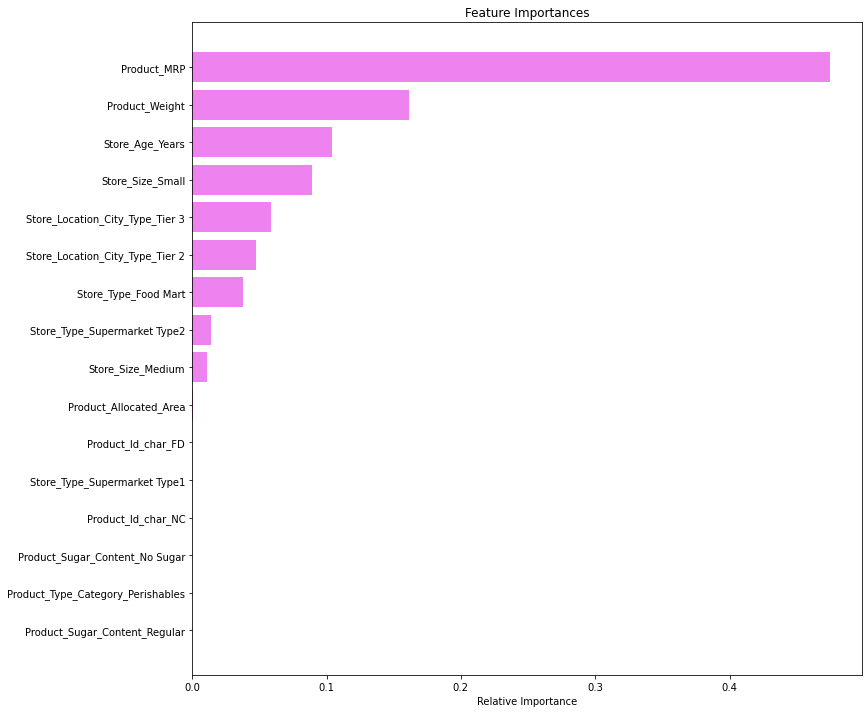

<IPython.core.display.Javascript object>

In [ ]:
feature_names = X_train.columns
importances = gb_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- The important features in the gradient boost estimator model are Product_MRP, Product_Weight, Store_Age_Years, Store_Size_Small, Store_Location_City_Type_Tier 3, Store_Location_City_Type_Tier 2 and Store_Type_Food Mart in descending order of importance.
- Product_MRP, Product_Weight and Store_Age_Years are the primary features for the prediction of total sales in this model which seems quite logical. 

#### Observed VS Predicted Values Plot of the test data for the best model i.e Gradient Boosting Model

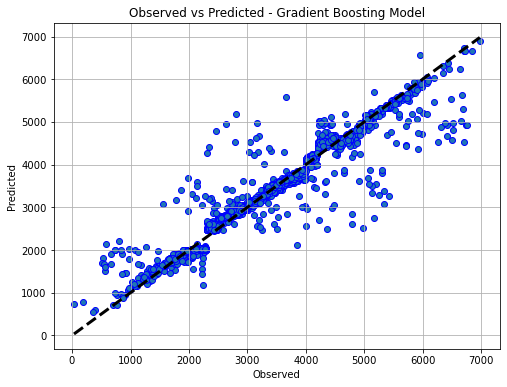

<IPython.core.display.Javascript object>

In [ ]:
# So plot observed and predicted values of the test data for the best model i.e. gradient boosting model
fig, ax = plt.subplots(figsize=(8, 6))
y_pred = gb_estimator.predict(X_test)
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=3)
ax.set_xlabel("Observed")
ax.set_ylabel("Predicted")
ax.set_title("Observed vs Predicted - Gradient Boosting Model")
plt.grid()
plt.show()

- We can see that points are dense on the line where predicted is equal to the observed.
- This implies that most of the predicted values are close to the true values with some exceptions as seen in the plot.

## Actionable Insights and Business Recommendations

- We can use this forecasting model to predict the total sales that will be done by SuperKart in the next quarter.

- The model explains around 90% of the variation in the data and can predict within ~6.5% of the actual sales of the product.

- **OUT004** - OUT004, which is of Supermarket Type2, located in a Tier 2 city and having store size as medium, is performing well. SuperKart can look to increase the size of this store from medium to high. They can also look to set up stores in this type of city having comparable socio-economic conditions in order to expand their business and reach.

- **OUT002** - OUT002, being a food mart in a Tier 3 city and having small store size, is also performing well. SuperKart can look to upgrade its size or target similar cities for business expansion.

- **OUT001** - OUT001 which is a store of Supermarket Type 1, located in a Tier 2 city and having store size as high is not performing upto the mark. SuperKart can look to look build new marketing strategies (maybe give attractive discounts and offers) in this store in order to attract more customers.

- **OUT003** - Similar approach can be taken to increase the business of OUT003 which is a Departmental store in a Tier 1 city and having store size as medium. It is the premium store of the company where most of the costly goods are sold, so the correct set of audience should be targetted.

- Daily needs like fruits and vegetables and snack foods are the biggest contributors to the revenue across all the stores. So SuperKart should look to maintain the inventory of these products properly and ensure that these products never face a shortage.

**Additional information that can be collected to gain better insights -**

- Customers' details like age and gender can be incorporated in this model so that the company gets to know their target audience well and can build their sales strategies according to that.

- The company should also keep a watch for the number of festive occasions present in a quarter so that they can strategize their inventory accordingly.